# **Yulu Buisness Case Study**

**About Yulu:**
* Yulu, India's pioneering micro-mobility service provider, has embarked on a mission to revolutionize daily commutes by offering unique, sustainable transportation solutions.
* However, recent revenue setbacks have prompted Yulu to seek the expertise of a consulting company to delve into the factors influencing the demand for their shared electric cycles, specifically in the Indian market.

**About this Case Study:**

**From Yulu's Perspective:**
- Strategic Expansion: Yulu's decision to enter the Indian market is a strategic move to expand its global footprint. Understanding the demand factors in this new market is essential to tailor their services and strategies accordingly.
* Revenue Recovery: Yulu's recent revenue decline is a pressing concern. By analyzing the factors affecting demand for shared electric cycles in the Indian market, they can make informed adjustments to regain profitability.

**Context:**
- Real-World Problem-Solving: It presents an opportunity to apply machine learning and data analysis techniques to address a real-world business problem.
- Market Insights: Analyzing factors affecting demand in the Indian market equips learners with market research skills. This knowledge is transferable to various industries.
- Consulting Skills: Learners can develop their ability to act as consultants, providing data-driven insights to organizations.



**Features of the Dataset:**
- datetime: datetime
- season: season (1: spring, 2: summer, 3: fall, 4: winter)
- holiday : whether day is a holiday or not
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
- weather:
    - 1: Clear, Few clouds, partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain +
    Scattered clouds
    - 4: Heavy Rain + Ice Pellets + Thunderstorm + Mist, Snow + Fog
- temp: temperature in Celsius
- atemp: feeling temperature in Celsius
- humidity: humidity
- windspeed: wind speed
- casual: count of casual users
- registered: count of registered users
- count: count of total rental bikes including both casual and registered

**Buisness Problem:**

**What is *Yulu* expecting?**

The company wants to know:
- Which variables are significant in predicting the demand for shared electric cycles in theIndian market?
- How well those variables describe the electric cycle demands?

## **What does ‘good’ look like?**

###**1. Define the Problem Statement, Import the required Libraries and perform Exploratory Data Analysis.**
- Examine dataset structure, characteristics, and statistical summary.
    
    Hint:
    - You can use .shape, .info(), .describe()
- Identify missing values and perform Imputation using an appropriate method.
    
    Hint:
     - You can use .isnull() or .isna()
- Identify and remove duplicate records.
    
    Hint:
     - You can use .duplicated()
- Analyze the distribution of Numerical & Categorical variables, separately
   
    Hint:
    - For Numerical features use Histogram, Distplot, etc.
    - For Categorical features use Countplot, Pie Chart, etc.
- Check for Outliers and deal with them accordingly.
    Hint:
    - You can use Boxplot, Interquartile Range (IQR)
    - Remove/Clip existing outliers as necessary.

In [1]:
# Importing the Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
from statsmodels.graphics.gofplots import qqplot

In [2]:
# Downloading the Data
!gdown 1o94fXnmvrx6jRgI6S-SeZ3tfnKjCDY0i

Downloading...
From: https://drive.google.com/uc?id=1o94fXnmvrx6jRgI6S-SeZ3tfnKjCDY0i
To: /content/bike_sharing.csv
100% 648k/648k [00:00<00:00, 85.3MB/s]


In [3]:
# Reading the data
df = pd.read_csv('bike_sharing.csv')

In [4]:
# First 5 rows
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [5]:
# Last 5 rows
df.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


In [6]:
# Size of the Data
df.shape
print('No. Of Rows:', df.shape[0])
print('No. Of Columns:', df.shape[1])

No. Of Rows: 10886
No. Of Columns: 12


In [7]:
#Checking the datatypes of all columns
df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [8]:
#Converting the Season, Holiday, Workingday and Weather columns to Object datatype
cat_cols= ['season', 'holiday', 'workingday', 'weather']
for col in cat_cols:
  df[col] = df[col].astype('object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  object 
 2   holiday     10886 non-null  object 
 3   workingday  10886 non-null  object 
 4   weather     10886 non-null  object 
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 1020.7+ KB


In [10]:
df.describe()

,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [11]:
# Converting the Datetime column from object to Datetime datatype
df['datetime'] = pd.to_datetime(df['datetime'])

In [12]:
df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [13]:
df.duplicated().value_counts()

False    10886
Name: count, dtype: int64

In [14]:
print('Starting Date:',df['datetime'].min())
print('Ending Date:',df['datetime'].max())

Starting Date: 2011-01-01 00:00:00
Ending Date: 2012-12-19 23:00:00


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  object        
 2   holiday     10886 non-null  object        
 3   workingday  10886 non-null  object        
 4   weather     10886 non-null  object        
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 1020.7+ KB


**Insights:**
- The dataset contains 10,886 entries and 12 columns.
- There are 886 registered users and 367 casual users.
- The dataset includes four weather patterns.
- The "datetime" column has been converted from an object to a datetime datatype.
- The "Season," "Holiday," "Workingday," and "Weather" columns have been changed to Object datatype.
- There are no null or duplicate values in the dataset.
- Data spans from January 1, 2011, to December 19, 2012, covering approximately 2 years.
- The maximum and minimum temperatures recorded are 41 and 1 degrees Celsius, with a mean of 21 degrees Celsius.
- Humidity ranges from 0 to 100, with an average of 61.9.
- Windspeed ranges from 0 to 57, with an average of 12.8 (unit not specified).




**Univariate Ananlysis**

In [16]:
# Extracting the Catergory columns
cat_cols = df.dtypes == 'object'
cat_cols = list(cat_cols[cat_cols].index)
cat_cols

['season', 'holiday', 'workingday', 'weather']

In [17]:
# Extracting the numerical columns
num_cols = ((df.dtypes != 'object') & (df.dtypes != 'datetime64[ns]'))
num_cols = list(num_cols[num_cols].index)
num_cols

['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']

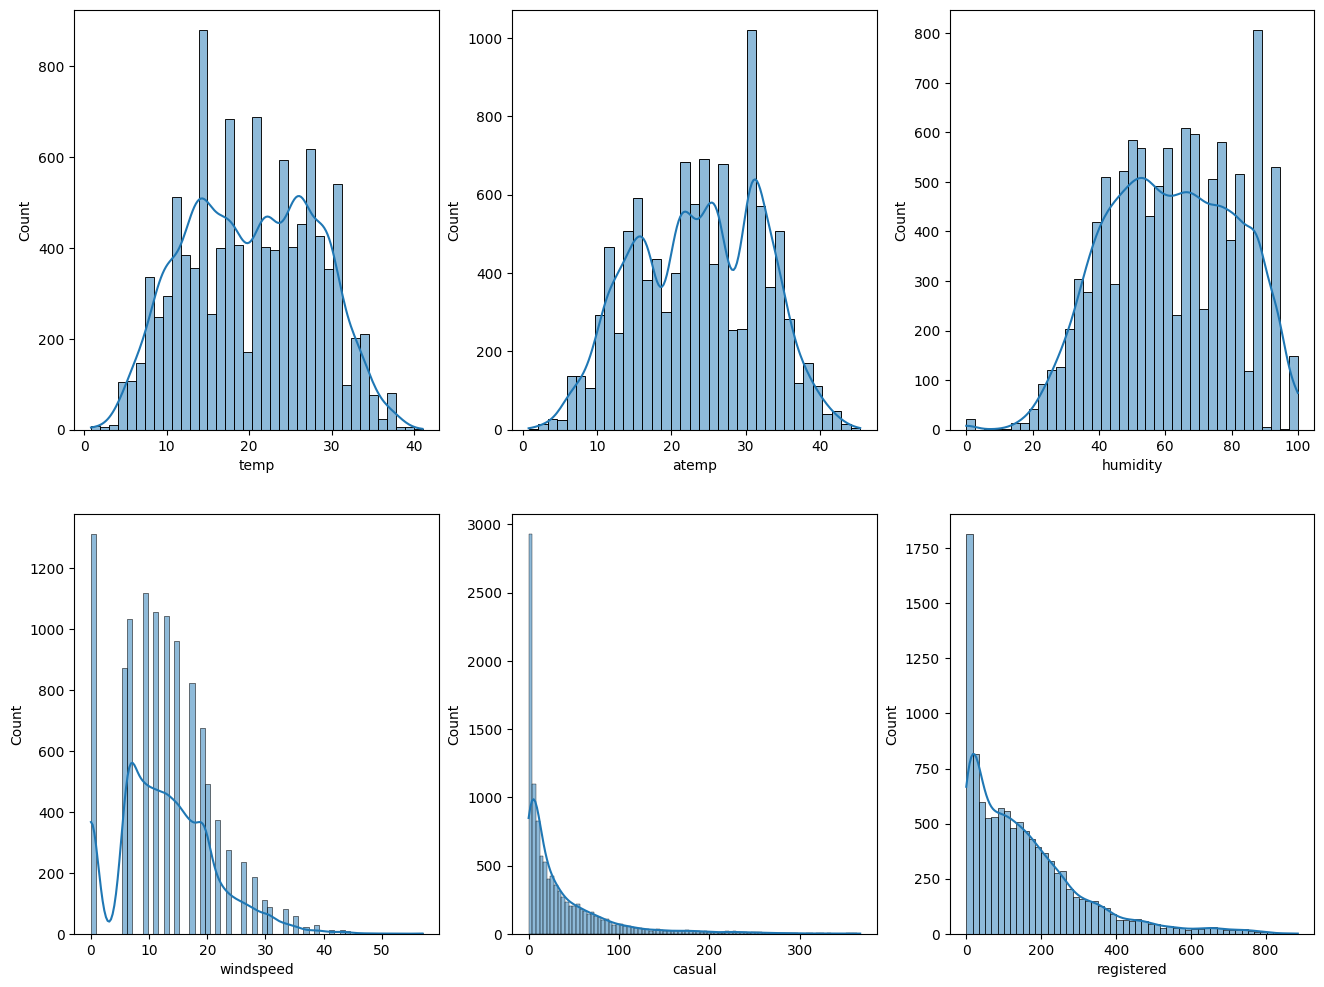

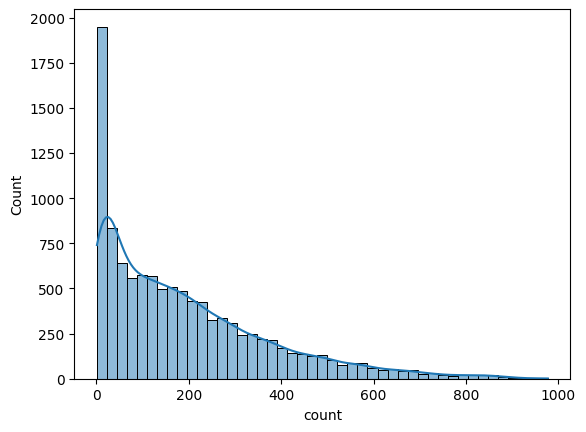

In [18]:
num_cols = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered','count']
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(16, 12))
index = 0
for row in range(2):
  for col in range(3):
    sns.histplot(df[num_cols[index]], ax=axis[row, col], kde=True)
    index += 1
plt.show()
sns.histplot(df[num_cols[-1]], kde=True)
plt.show()

**Insights:**
- Casual, registered and count somewhat looks like Log Normal Distrinution and are right skewed.
- Temp, atemp and humidity looks like they follows the Normal Distribution


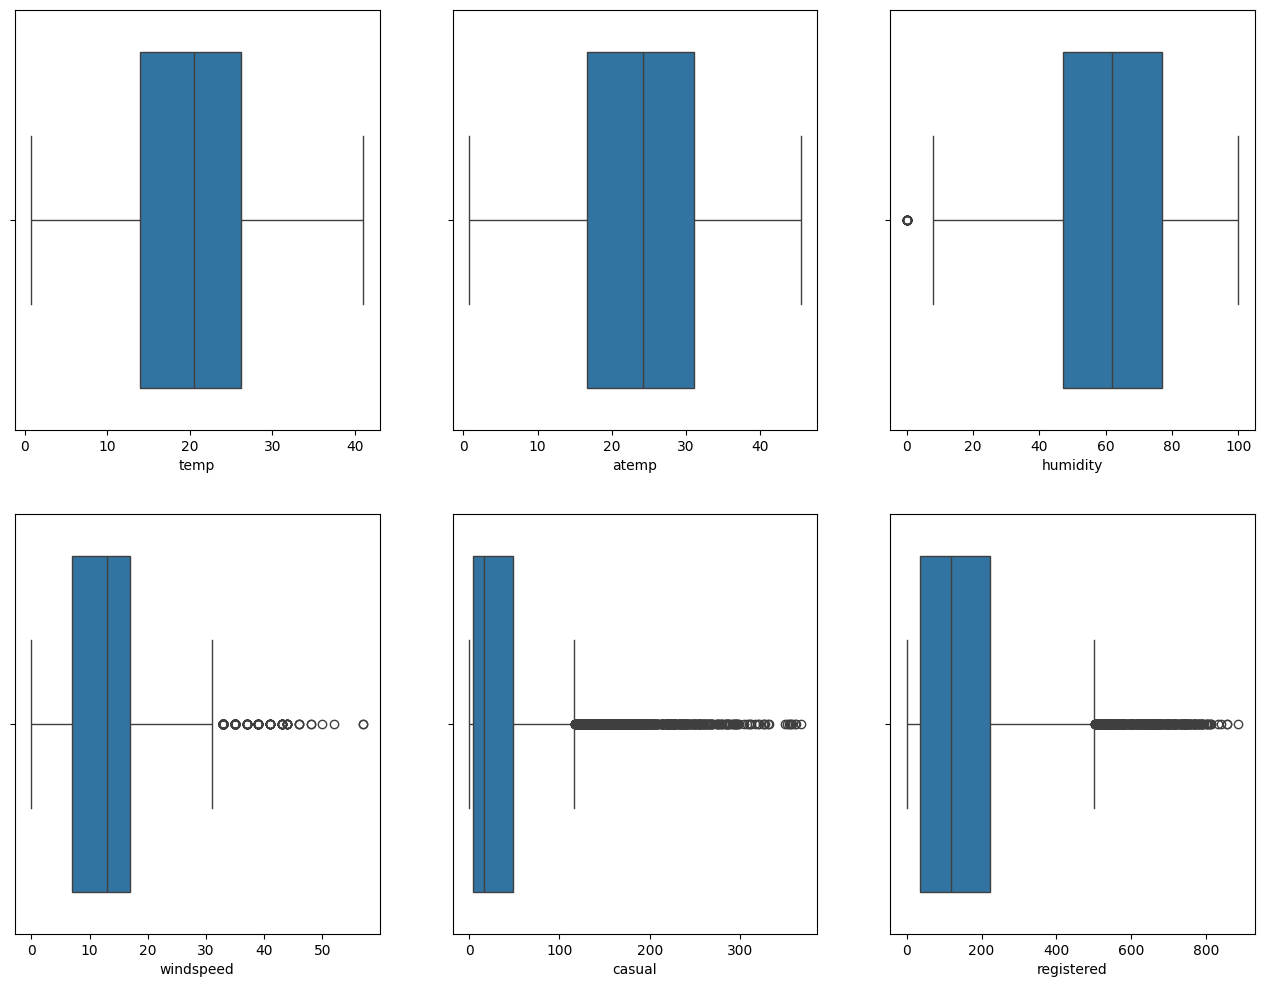

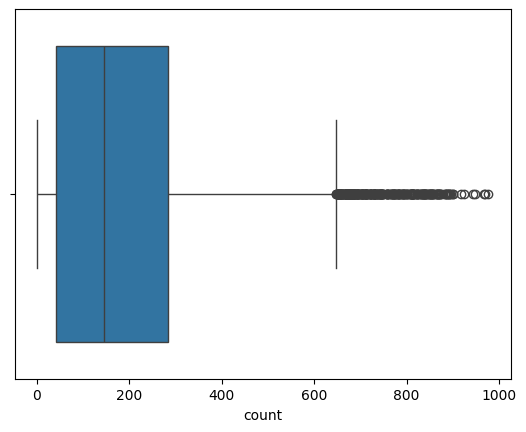

In [19]:
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(16, 12))
index = 0
for row in range(2):
  for col in range(3):
    sns.boxplot(x=df[num_cols[index]], ax=axis[row, col])
    index += 1
plt.show()
sns.boxplot(x=df[num_cols[-1]])
plt.show()

In [20]:
df['windspeed'].describe()

count    10886.000000
mean        12.799395
std          8.164537
min          0.000000
25%          7.001500
50%         12.998000
75%         16.997900
max         56.996900
Name: windspeed, dtype: float64

In [21]:
#Clipping Data between the 5 percentile and 95 percentile for Windspeed column
m_05 = df['windspeed'].quantile(0.05) # 5th quantile
m_95 = df['windspeed'].quantile(0.95) # 95th quantile
df['windspeed'].clip(m_05, m_95, inplace=True)

In [22]:
df['casual'].describe()

count    10886.000000
mean        36.021955
std         49.960477
min          0.000000
25%          4.000000
50%         17.000000
75%         49.000000
max        367.000000
Name: casual, dtype: float64

In [23]:
#Clipping Data between the 5 percentile and 90 percentile for casual column
m_05 = df['casual'].quantile(0.05) # 5th quantile
m_95 = df['casual'].quantile(0.90) # 90th quantile
df['casual'].clip(m_05, m_95, inplace=True)

In [24]:
df['registered'].describe()

count    10886.000000
mean       155.552177
std        151.039033
min          0.000000
25%         36.000000
50%        118.000000
75%        222.000000
max        886.000000
Name: registered, dtype: float64

In [25]:
#Clipping Data between the 5 percentile and 95 percentile for Registered column
m_05 = df['registered'].quantile(0.05) # 5th quantile
m_95 = df['registered'].quantile(0.95) # 95th quantile
df['registered'].clip(m_05, m_95, inplace=True)

<Axes: xlabel='registered'>

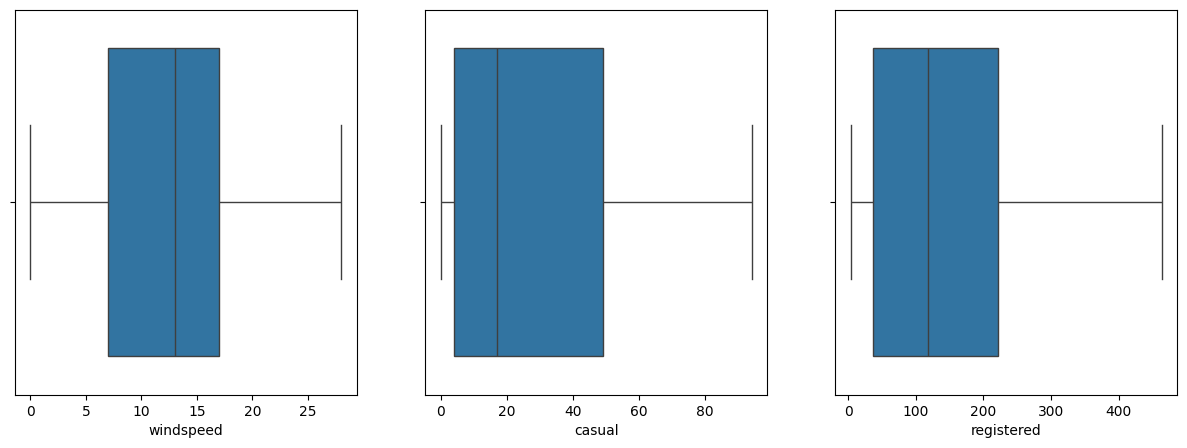

In [26]:
plt.figure(figsize = (15,5))
plt.subplot(131)
sns.boxplot(x = df['windspeed'])
plt.subplot(132)
sns.boxplot(x = df['casual'])
plt.subplot(133)
sns.boxplot(x = df['registered'])

**Insights:**

- There is no outlier in the temp column.
- There are few outliers present in humidity column.
- There are many outliers present in each of the columns : windspeed, casual, registered, count.
- Using np.clip() the outliers were removed for windspeed, casual and registered columns.


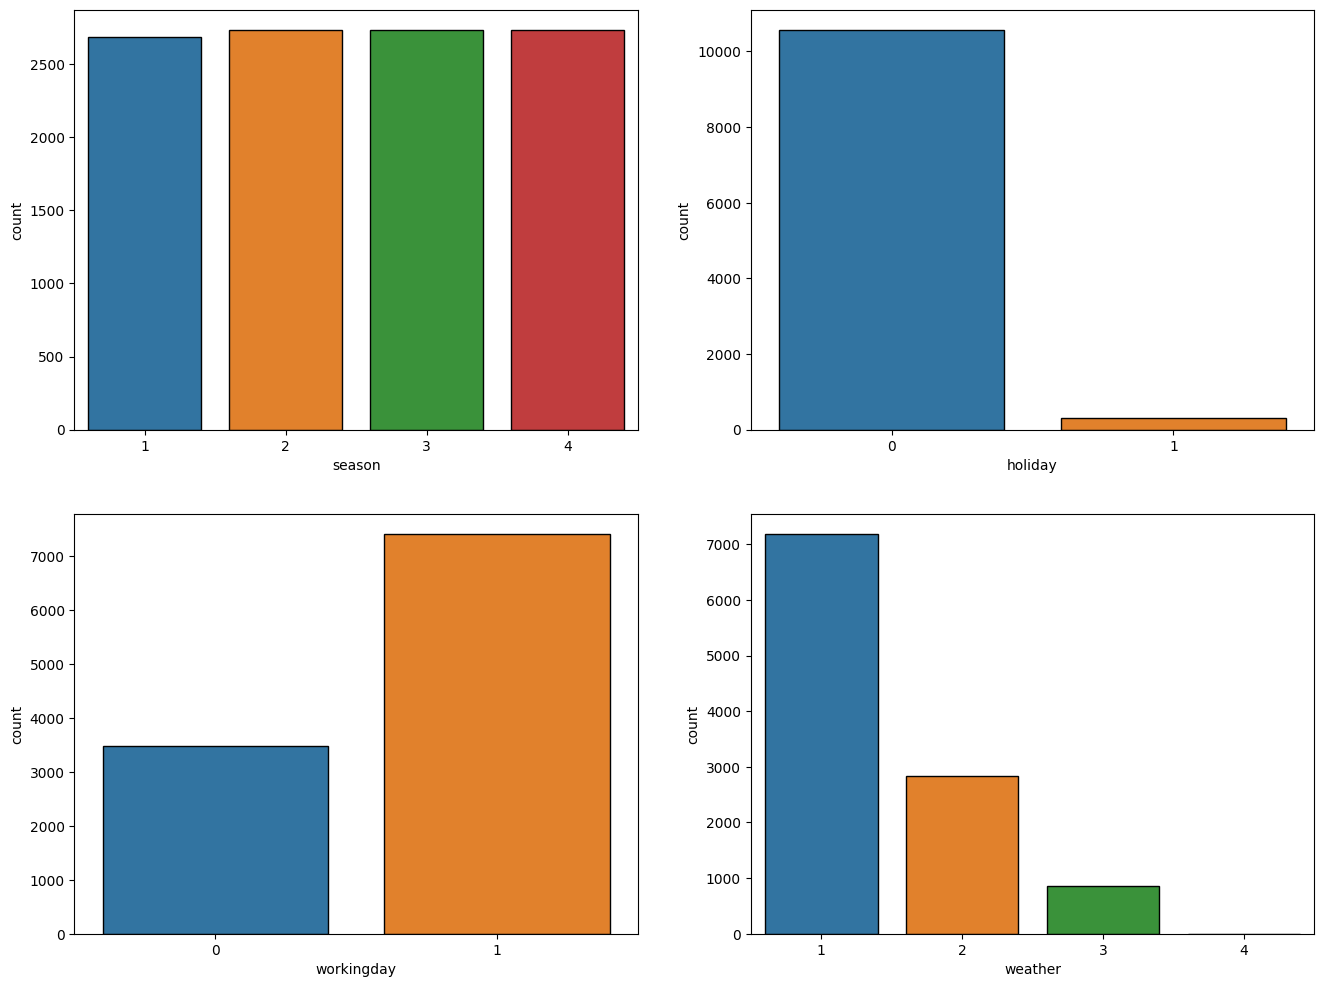

In [27]:
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
index = 0
for row in range(2):
  for col in range(2):
    sns.countplot(data=df, x=cat_cols[index], ax=axis[row, col], palette = 'tab10', edgecolor = "black")
    index += 1
plt.show()

**Insights:**

- Data looks common as it should be like equal number of days in each season, more working days and weather is mostly Clear, Few clouds, partly cloudy, partly cloudy

**Bi-Variate Analysis**

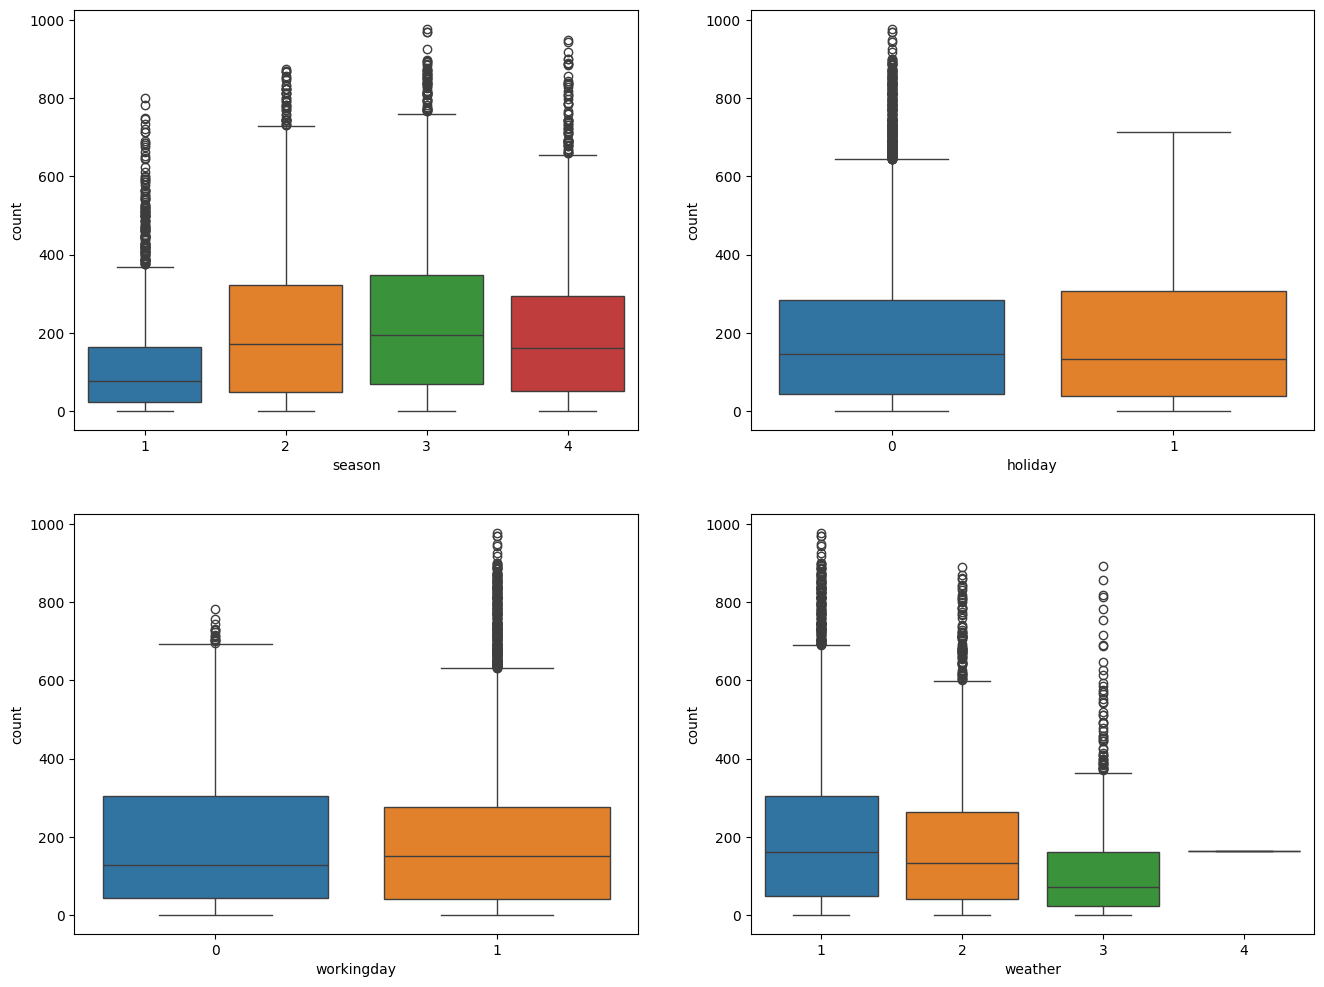

In [28]:
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
index = 0
for row in range(2):
  for col in range(2):
    sns.boxplot(data=df, x=cat_cols[index], y='count', ax=axis[row, col], palette = 'tab10')
    index += 1
plt.show()

**Insights:**
- In summer and fall seasons more bikes are rented as compared to other seasons.
- Whenever its a holiday more bikes are rented.
- It is also clear from the workingday also that whenever day is holiday or weekend, slightly
more bikes were rented.
- Whenever there is rain, thunderstorm, snow or fog, there were less bikes were rented.


### **2. Try establishing a Relationship between the Dependent and Independent Variables.**
  Hint:
  - i. Plot a Correlation Heatmap and draw insights.
  - ii. Remove the highly correlated variables, if any.


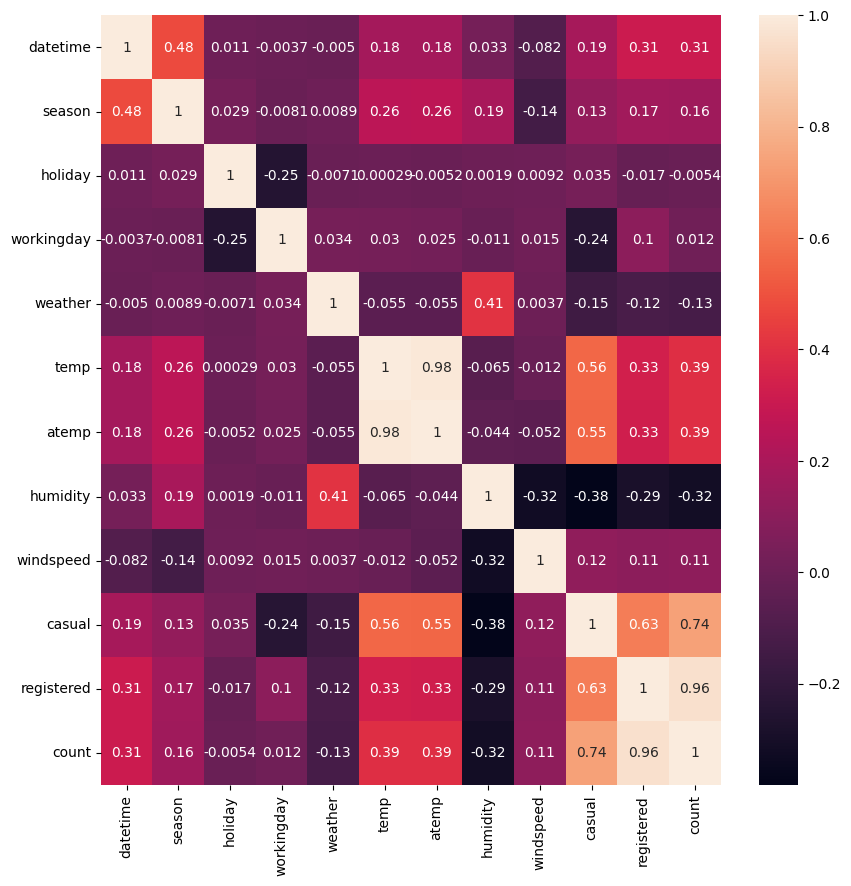

In [29]:
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

### **3. Check if there any significant difference between the no. of bike rides on Weekdays and Weekends?**

  1. Formulate Null Hypothesis (H0) and Alternate Hypothesis (Ha)
  2. Select an appropriate test -
     
     Hint:
        - 2- Sample Independent T-test
  3. Set a significance level
     
     Hint:
        - alpha=5% is recommended
  4. Calculate test Statistics / p-value
  5. Decide whether to accept or reject the Null Hypothesis.
    
    Hint:
    - i. If the p-value is less than or equal to the predetermined level of
          significance (alpha), we have evidence to reject the null hypothesis.
    - ii. If the p-value is greater than the predetermined level of significance (alpha), we do not have sufficient evidence to reject the null hypothesis.
  6. Draw inferences & conclusions from the analysis and provide recommendations.


In [30]:
df['workingday'].value_counts()

workingday
1    7412
0    3474
Name: count, dtype: int64

Formulating the Null and Alternative Hypothesis:
- **H0 (Null Hypothesis)**: The Average number of bikes rented on weekend and weekday is same.
- **Ha (Alternate Hypothesis)**: The Average number of bikes rented on weekend and weekday is different.

  Since we are comparing a *Numerical* variable with a *Categorical (With 2 Groups)* variable we can use ***Two-Sample Independent T-test.***

  To perform the Two-Sample Independent T-test, the data must follow *Normal Distribution*. To check this, we shall perform *Shapiro-Wilk* test and *Levene's Test* to check if the two groups have equal variences.
  

In [84]:
# Extracting Data based on working and non-working/weekend day

working_day = df[df['workingday']==0]['count'].values
weekend = df[df['workingday']==1]['count'].values

# Shapiro-Wilk Test for Normality
  # Null Hypothesis(H0) : Data is Normally distributed
  # Alternate Hypothesis(Ha) : Data is not Normally distributed

#Shapiro-Wilk Test for Working Day

shapiro_stat,p_value = stats.shapiro(working_day)
alpha = 0.05
print("Confidence Interval: 95%")
print("Wilkin-Shapiro test with Test Statistic: {}, and p-value: {}".format(shapiro_stat,p_value))

if p_value < alpha:
    print("Reject H0: Data is not Normally distributed")
else:
    print("Failed to reject H0: Data is Normally distributed")

#Shapiro-Wilk Test for Weekend

shapiro_stat,p_value = stats.shapiro(weekend)
alpha = 0.05
print("Confidence Interval: 95%")
print("Wilkin-Shapiro test with Test Statistic: {}, and p-value: {}".format(shapiro_stat,p_value))

if p_value < alpha:
    print("Reject H0: Data is not Normally distributed")
else:
    print("Failed to reject H0: Data is Normally distributed")

Confidence Interval: 95%
Wilkin-Shapiro test with Test Statistic: 0.8852126598358154, and p-value: 4.203895392974451e-45
Reject H0: Data is not Normally distributed
Confidence Interval: 95%
Wilkin-Shapiro test with Test Statistic: 0.8702582120895386, and p-value: 0.0
Reject H0: Data is not Normally distributed


In [32]:
# Levene's Test
  # Null Hypothesis(H0) : Variences are Equal.
  # Alternate Hypothesis(Ha) : Variences are not Equal.

levene_stat,p_value = stats.levene(working_day, weekend)
alpha = 0.05
print("Confidence Interval: 95%")
print("Levene's test with Test Statistic: {}, and p-value: {}".format(levene_stat,p_value))

if p_value < alpha:
    print("Reject H0: Variences are not Equal")
else:
    print("Failed to reject H0: Variences are Equal")

Confidence Interval: 95%
Levene's test with Test Statistic: 0.004972848886504472, and p-value: 0.9437823280916695
Failed to reject H0: Variences are Equal


**Insights:**
- From the *Shapiro-Wilk* test we can conclude that the data is not Normally distributed, still we shall continue to perform the analysis.
- From Levene's test we can conclude that the varience are equal among the groups.

In [33]:
# Implementing Two Sample Independent T-Test

test_statistic, p_value = stats.ttest_ind(working_day, weekend, alternative = 'two-sided')
print("Two Sample Independent T-Test with Test Statistic: {}, and p-value: {}".format(test_statistic,p_value))
alpha = 0.05
print("Confidence Interval: 95%")

if p_value < alpha:
    print("Reject H0: Working Day has an impact on the count of rented electric cycles.")
else:
    print("Failed to reject H0: Working Day doesn't have impact on the count of rented electric cycles.")

Two Sample Independent T-Test with Test Statistic: -1.2096277376026694, and p-value: 0.22644804226361348
Confidence Interval: 95%
Failed to reject H0: Working Day doesn't have impact on the count of rented electric cycles.


**Insights:**
- Conclusion: Since p-value is greater than 0.05 so we can not reject the Null hypothesis.

  **We don't have the sufficient evidence to say that working day has effect on the number of cycles being rented.**

###**4. Check if the demand of bicycles on rent is the same for different Weather conditions?**
  1. Formulate Null Hypothesis (H0) and Alternate Hypothesis (Ha)
  2. Select an appropriate test -
    
      Hint:
      - One-way ANOVA test
  3. Check assumptions of the test
    - Normality
      
      Hint:
      - Use Histogram, Q-Q Plot, Skewness & Kurtosis
      - Shapiro-Wilk’s test
    - Equality Variance
      
      Hint:
       - Levene’s test
    - Please continue doing the analysis even if some assumptions fail
      (Levene’s test or Shapiro-wilk test) but double check using visual
      analysis and report wherever necessary.
  4. Set a significance level and Calculate the test Statistics / p-value.
      
      Hint:
        - alpha = 5% is recommended
  5. Decide whether to accept or reject the Null Hypothesis.
     Hint:
      - If the p-value is less than or equal to the predetermined level of
      significance (alpha), we have evidence to reject the null hypothesis.
      - If the p-value is greater than the predetermined level of significance
      (alpha), we do not have sufficient evidence to reject the null hypothesis.
  6. Draw inferences & conclusions from the analysis and provide recommendations.

In [34]:
df['weather'].value_counts()

weather
1    7192
2    2834
3     859
4       1
Name: count, dtype: int64

Formulating Null and Alternate Hypothesis:

- **Null Hypothesis (H0)** : Weather doesn't have impact on the count of rented electric bikes,i.e., No. of bikes are same in different weather.

- **Alternate Hypothesis (Ha)** : Weather does have impact on the count of rented electric bikes,i.e., No. of bikes are different in different weather.

  Since we are comparing a *Numerical* variable with a *Categorical (With more than 2 Groups)* variable we can use ***One-way ANOVA Test.***

  To perform the One-way ANOVA Test, the data must follow *Normal Distribution*. To check this, we shall perform *Shapiro-Wilk* test and *Levene's Test* to check if the two groups have equal variences.

In [35]:
weather1 = df[df['weather'] == 1]['count'].values
weather2 = df[df['weather'] == 2]['count'].values
weather3 = df[df['weather'] == 3]['count'].values
weather4 = df[df['weather'] == 4]['count'].values

Confidence Interval: 95%
Wilkin-Shapiro test with Test Statistic: 0.8909230828285217, and p-value: 0.0
Reject H0: Data is not Normally distributed


<Figure size 500x500 with 0 Axes>

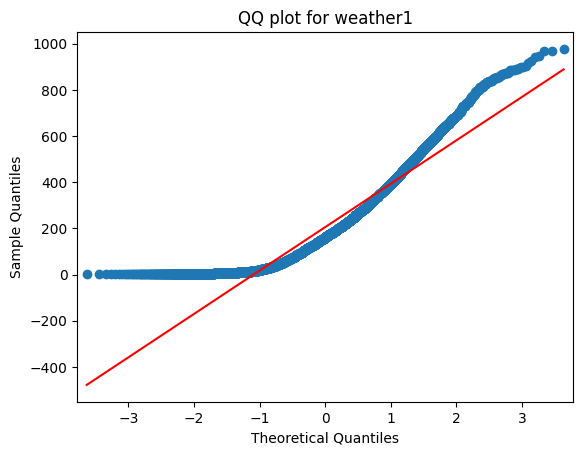

In [36]:
# Shapiro-Wilk Test for Normality
  # Null Hypothesis(H0) : Data is Normally distributed
  # Alternate Hypothesis(Ha) : Data is not Normally distributed

shapiro_stat,p_value = stats.shapiro(weather1)
alpha = 0.05
print("Confidence Interval: 95%")
print("Wilkin-Shapiro test with Test Statistic: {}, and p-value: {}".format(shapiro_stat,p_value))

if p_value < alpha:
    print("Reject H0: Data is not Normally distributed")
else:
    print("Failed to reject H0: Data is Normally distributed")

# QQ-Plot visualization for Normality Check

plt.figure(figsize = (5,5))
qqplot(weather1, line = 's')
plt.title('QQ plot for weather1')
plt.show()

Confidence Interval: 95%
Wilkin-Shapiro test with Test Statistic: 0.8767687082290649, and p-value: 9.781063280987223e-43
Reject H0: Data is not Normally distributed


<Figure size 500x500 with 0 Axes>

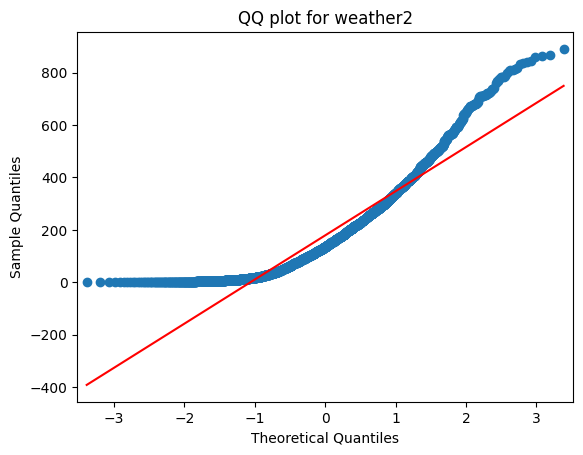

In [37]:
# Shapiro-Wilk Test for Normality
  # Null Hypothesis(H0) : Data is Normally distributed
  # Alternate Hypothesis(Ha) : Data is not Normally distributed

shapiro_stat,p_value = stats.shapiro(weather2)
alpha = 0.05
print("Confidence Interval: 95%")
print("Wilkin-Shapiro test with Test Statistic: {}, and p-value: {}".format(shapiro_stat,p_value))

if p_value < alpha:
    print("Reject H0: Data is not Normally distributed")
else:
    print("Failed to reject H0: Data is Normally distributed")

# QQ-Plot visualization for Normality Check

plt.figure(figsize = (5,5))
qqplot(weather2, line = 's')
plt.title('QQ plot for weather2')
plt.show()

Confidence Interval: 95%
Wilkin-Shapiro test with Test Statistic: 0.7674332857131958, and p-value: 3.876090133422781e-33
Reject H0: Data is not Normally distributed


<Figure size 500x500 with 0 Axes>

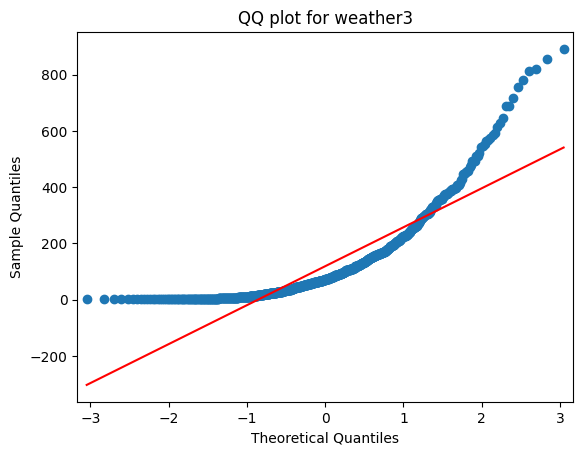

In [38]:
# Shapiro-Wilk Test for Normality
  # Null Hypothesis(H0) : Data is Normally distributed
  # Alternate Hypothesis(Ha) : Data is not Normally distributed

shapiro_stat,p_value = stats.shapiro(weather3)
alpha = 0.05
print("Confidence Interval: 95%")
print("Wilkin-Shapiro test with Test Statistic: {}, and p-value: {}".format(shapiro_stat,p_value))

if p_value < alpha:
    print("Reject H0: Data is not Normally distributed")
else:
    print("Failed to reject H0: Data is Normally distributed")

# QQ-Plot visualization for Normality Check

plt.figure(figsize = (5,5))
qqplot(weather3, line = 's')
plt.title('QQ plot for weather3')
plt.show()

In [39]:
# Levene's Test
  # Null Hypothesis(H0) : Variences are Equal.
  # Alternate Hypothesis(Ha) : Variences are not Equal.

levene_stat,p_value = stats.levene(weather1, weather2, weather3, weather4)
alpha = 0.05
print("Confidence Interval: 95%")
print("Levene's test with Test Statistic: {}, and p-value: {}".format(levene_stat,p_value))

if p_value < alpha:
    print("Reject H0: Variences are not Equal")
else:
    print("Failed to reject H0: Variences are Equal")

Confidence Interval: 95%
Levene's test with Test Statistic: 54.85106195954556, and p-value: 3.504937946833238e-35
Reject H0: Variences are not Equal


**Insights:**
- Since, weather 4 has only one data point, not able to perform shapiro-wilk test on it.
- Data is not normally distributed, and variance among the groups are not equal, this violates the assumption of ANOVA. Moreover, we have more than two categories here, with weather being the categorical data and count being the numerical. Though the assumptions of One-Way ANOVA fail we shall still perform the test.
- If the assumptions of ANOVA fail we can use Kruskal-Wallis Test, we shall perform this test also.

In [40]:
#  Implementation of One-way ANOVA test

test_statistic,p_value = stats.f_oneway(weather1, weather2, weather3, weather4)
print("One-way ANOVA Test with Test Statistic: {}, and p-value: {}".format(test_statistic,p_value))
alpha = 0.05
print("Confidence Interval: 95%")

if p_value < alpha:
    print("Reject H0: Weather does have impact on the count of rented electric bikes.")
else:
    print("Failed to reject H0: Weather doesn't have impact on the count of rented electric bikes.")

One-way ANOVA Test with Test Statistic: 65.53024112793271, and p-value: 5.482069475935669e-42
Confidence Interval: 95%
Reject H0: Weather does have impact on the count of rented electric bikes.


In [41]:
#  Implementation of Kruskal-Wallis Test

test_statistic,p_value = stats.kruskal(weather1, weather2, weather3, weather4)
print("Kruskal-Wallis Test with Test Statistic: {}, and p-value: {}".format(test_statistic,p_value))
alpha = 0.05
print("Confidence Interval: 95%")

if p_value < alpha:
    print("Reject H0: Weather does have impact on the count of rented electric bikes.")
else:
    print("Failed to reject H0: Weather doesn't have impact on the count of rented electric bikes.")

Kruskal-Wallis Test with Test Statistic: 205.00216514479087, and p-value: 3.501611300708679e-44
Confidence Interval: 95%
Reject H0: Weather does have impact on the count of rented electric bikes.


**Insights:**
- We have set-up the Null and Alternate hypothesis, as these data have more than two categories and the data is not normal for different weather conditions and variance among the groups are also not equal, this violates the assumptions of ANOVA. Therefore, we have used Kruskal-Wallis Test on the data and checked the result with 95% confidence interval. We also used ANOVA (f_oneway) on the data.
- **The results from both tests indicate that the p-value is below the significance threshold of 0.05. Therefore, we reject the null hypothesis and infer that weather significantly influences the count of rented electric bikes. This suggests that the number of bikes rented varies across different weather conditions.**

###**5. Check if the demand of bicycles on rent is the same for different Seasons?**
1. Formulate Null Hypothesis (H0) and Alternate Hypothesis (H1)
2. Select an appropriate test -
   
   Hint:
    - One-way ANOVA test
3. Check assumptions of the test
  - Normality
    
    Hint:
    - Use Histogram, Q-Q Plot, Skewness & Kurtosis
    - Shapiro-Wilk’s test
  - Equality Variance
    
    Hint:
      - Levene’s test
  - Please continue doing the analysis even if some assumptions fail
  (Levene’s test or Shapiro-wilk test) but double check using visual
  analysis and report wherever necessary.
4. Set a significance level and Calculate the test Statistics / p-value.
    Hint:
      - alpha=5% is recommended
5. Decide whether to accept or reject the Null Hypothesis.
  Hint:
      - If the p-value is less than or equal to the predetermined level of
        significance (alpha), we have evidence to reject the null hypothesis.
      - If the p-value is greater than the predetermined level of significance
        (alpha), we do not have sufficient evidence to reject the null hypothesis.
6. Draw inferences & conclusions from the analysis and provide recommendations.


In [ ]:
df['season'].value_counts()

season
4    2734
2    2733
3    2733
1    2686
Name: count, dtype: int64

In [51]:
# Using pd.cut() Replacing the numbers in season column with their respective Seasonal Names
x = df['season']
bins = [0, 1, 2, 3, 4]
labels = ['Spring', 'Summer', 'Fall', 'Winter']
df['Season_1'] = pd.cut(x, bins = bins, labels = labels)

In [53]:
df['Season_1'].value_counts()

Season_1
Winter    2734
Summer    2733
Fall      2733
Spring    2686
Name: count, dtype: int64

In [54]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Season_1
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,Spring
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,Spring
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,Spring
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,Spring
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,4,1,Spring


Formulating the Null and ALternate Hypothesis:
- **Null Hypothesis (H0)**: Season doesn't have impact on the count of rented electric bikes,i.e., No. of bikes are same in different seasons.

- **Alternate Hypothesis (Ha)**: Season does have impact on the count of rented electric bikes,i.e., No. of bikes are different in different seasons.

 Since we are comparing a *Numerical* variable with a *Categorical (With more than 2 Groups)* variable we can use ***One-way ANOVA Test.***

  To perform the One-way ANOVA Test, the data must follow *Normal Distribution*. To check this, we shall perform *Shapiro-Wilk* test and *Levene's Test* to check if the two groups have equal variences.

In [56]:
# Extracting Data Seasonwise
season_1 = df[df['Season_1'] == 'Spring']['count'].values
season_2 = df[df['Season_1'] == 'Summer']['count'].values
season_3 = df[df['Season_1'] == 'Fall']['count'].values
season_4 = df[df['Season_1'] == 'Winter']['count'].values

Confidence Interval: 95%
Wilkin-Shapiro test with Test Statistic: 0.8087388873100281, and p-value: 0.0
Reject H0: Data is not Normally distributed


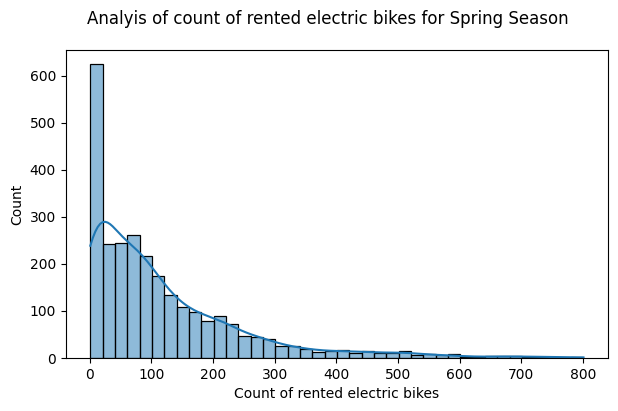

In [64]:
# Shapiro-Wilk Test for Normality for different seasons
  # Null Hypothesis(H0) : Data is Normally distributed
  # Alternate Hypothesis(Ha) : Data is not Normally distributed

shapiro_stat,p_value = stats.shapiro(season_1)
alpha = 0.05
print("Confidence Interval: 95%")
print("Wilkin-Shapiro test with Test Statistic: {}, and p-value: {}".format(shapiro_stat,p_value))

if p_value < alpha:
    print("Reject H0: Data is not Normally distributed")
else:
    print("Failed to reject H0: Data is Normally distributed")

plt.figure(figsize = (7, 4))
sns.histplot(season_1, kde = True)
plt.suptitle("Analyis of count of rented electric bikes for Spring Season")
plt.xlabel("Count of rented electric bikes")
plt.show()

Confidence Interval: 95%
Wilkin-Shapiro test with Test Statistic: 0.900481641292572, and p-value: 6.039093315091269e-39
Reject H0: Data is not Normally distributed


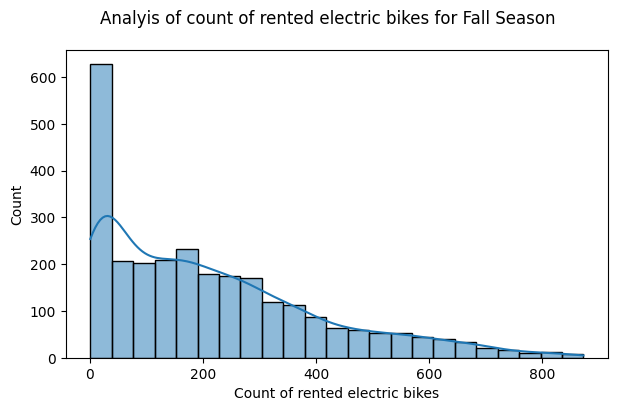

In [66]:
# Shapiro-Wilk Test for Normality for different seasons
  # Null Hypothesis(H0) : Data is Normally distributed
  # Alternate Hypothesis(Ha) : Data is not Normally distributed

shapiro_stat,p_value = stats.shapiro(season_2)
alpha = 0.05
print("Confidence Interval: 95%")
print("Wilkin-Shapiro test with Test Statistic: {}, and p-value: {}".format(shapiro_stat,p_value))

if p_value < alpha:
    print("Reject H0: Data is not Normally distributed")
else:
    print("Failed to reject H0: Data is Normally distributed")

plt.figure(figsize = (7, 4))
sns.histplot(season_2, kde = True)
plt.suptitle("Analyis of count of rented electric bikes for Summer Season")
plt.xlabel("Count of rented electric bikes")
plt.show()

Confidence Interval: 95%
Wilkin-Shapiro test with Test Statistic: 0.9148160815238953, and p-value: 1.043458045587339e-36
Reject H0: Data is not Normally distributed


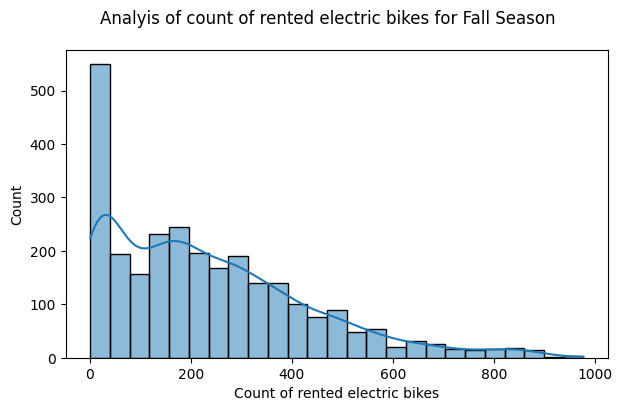

In [67]:
# Shapiro-Wilk Test for Normality for different seasons
  # Null Hypothesis(H0) : Data is Normally distributed
  # Alternate Hypothesis(Ha) : Data is not Normally distributed

shapiro_stat, p_value = stats.shapiro(season_3)
alpha = 0.05
print("Confidence Interval: 95%")
print("Wilkin-Shapiro test with Test Statistic: {}, and p-value: {}".format(shapiro_stat,p_value))

if p_value < alpha:
    print("Reject H0: Data is not Normally distributed")
else:
    print("Failed to reject H0: Data is Normally distributed")

plt.figure(figsize = (7, 4))
sns.histplot(season_3, kde = True)
plt.suptitle("Analyis of count of rented electric bikes for Fall Season")
plt.xlabel("Count of rented electric bikes")
plt.show()

Confidence Interval: 95%
Wilkin-Shapiro test with Test Statistic: 0.8954644799232483, and p-value: 1.1301682309549298e-39
Reject H0: Data is not Normally distributed


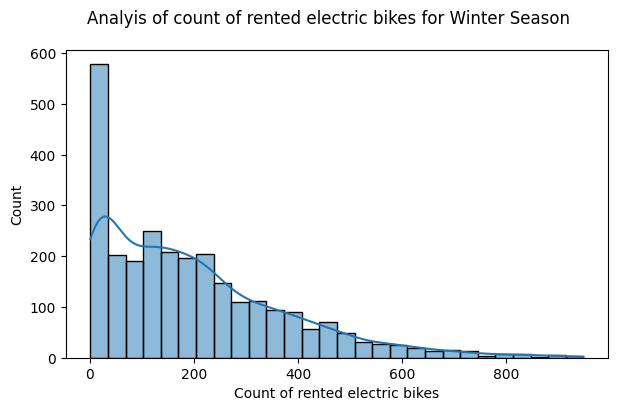

In [68]:
# Shapiro-Wilk Test for Normality for different seasons
  # Null Hypothesis(H0) : Data is Normally distributed
  # Alternate Hypothesis(Ha) : Data is not Normally distributed

shapiro_stat,p_value = stats.shapiro(season_4)
alpha = 0.05
print("Confidence Interval: 95%")
print("Wilkin-Shapiro test with Test Statistic: {}, and p-value: {}".format(shapiro_stat,p_value))

if p_value < alpha:
    print("Reject H0: Data is not Normally distributed")
else:
    print("Failed to reject H0: Data is Normally distributed")

plt.figure(figsize = (7, 4))
sns.histplot(season_4, kde = True)
plt.suptitle("Analyis of count of rented electric bikes for Winter Season")
plt.xlabel("Count of rented electric bikes")
plt.show()

In [70]:
# Levene's Test
  # Null Hypothesis(H0) : Variences are Equal.
  # Alternate Hypothesis(Ha) : Variences are not Equal.

levene_stat,p_value = stats.levene(season_1, season_2, season_3, season_4)
alpha = 0.05
print("Confidence Interval: 95%")
print("Levene's test with Test Statistic: {}, and p-value: {}".format(levene_stat,p_value))

if p_value < alpha:
    print("Reject H0: Variences are not Equal")
else:
    print("Failed to reject H0: Variences are Equal")

Confidence Interval: 95%
Levene's test with Test Statistic: 187.7706624026276, and p-value: 1.0147116860043298e-118
Reject H0: Variences are not Equal


**Insights:**
- Data is not normally distributed, and variance among the groups are not equal, this violates the assumption of ANOVA. Moreover, we have more than two categories here, with season being the categorical data and count being the numerical. Though the assumptions of One-Way ANOVA fail we shall still perform the test.
- If the assumptions of ANOVA fail we can use Kruskal-Wallis Test, we shall perform this test also.

In [71]:
#  Implementation of One-way ANOVA test

test_statistic,p_value = stats.f_oneway(season_1, season_2, season_3, season_4)
print("One-way ANOVA Test with Test Statistic: {}, and p-value: {}".format(test_statistic,p_value))
alpha = 0.05
print("Confidence Interval: 95%")
if p_value < alpha:
    print("Reject H0: Season does have impact on the count of rented electric bikes.")
else:
    print("Failed to reject H0: Season doesn't have impact on the count of rented electric bikes.")

One-way ANOVA Test with Test Statistic: 236.94671081032106, and p-value: 6.164843386499654e-149
Confidence Interval: 95%
Reject H0: Season does have impact on the count of rented electric bikes.


In [69]:
#  Implementation of Kruskal-Wallis Test

test_statistic,p_value = stats.kruskal(season_1, season_2, season_3, season_4)
print("Kruskal-Wallis Test with Test Statistic: {}, and p-value: {}".format(test_statistic,p_value))
alpha = 0.05
print("Confidence Interval: 95%")
if p_value < alpha:
    print("Reject H0: Season does have impact on the count of rented electric bikes.")
else:
    print("Failed to reject H0: Season doesn't have impact on the count of rented electric bikes.")

Kruskal-Wallis Test with Test Statistic: 699.6668548181988, and p-value: 2.479008372608633e-151
Confidence Interval: 95%
Reject H0: Season does have impact on the count of rented electric bikes.


**Insights:**
- After establishing the Null and Alternate hypotheses, given the presence of more than two categories and the non-normality of the data for each season, along with unequal variance among the groups, ANOVA assumptions are violated. Consequently, we opted for the Kruskal-Wallis Test, along with conducting ANOVA (f_oneway) as a supplementary measure.
- Results from both tests demonstrate that the p-value falls below the significance threshold of 0.05. Thus, we reject the null hypothesis and deduce that seasons significantly impact the count of rented electric bikes. This indicates that the number of bikes rented varies across different seasons.

###**6. Check if the Weather conditions are significantly different during different Seasons?**
1. Formulate Null Hypothesis (H0) and Alternate Hypothesis (H1)
   
   Hint:
      - The values in ‘Weather’ & ‘Season’ columns should be treated as
      distinct Categories. Encode them accordingly.
2. Select an appropriate test -
   
   Hint:
    - Chi-square test
3. Create a Contingency Table against ‘Weather’ & ‘Season’ columns
    
   Hint:
    - You can use a Pandas’ CrossTab
4. Set a significance level and Calculate the test Statistics / p-value.
   
   Hint:
    - alpha=5% is recommended
5. Decide whether to accept or reject the Null Hypothesis.
   Hint:
    - If the p-value is less than or equal to the predetermined level of
    significance (alpha), we have evidence to reject the null hypothesis.
    - If the p-value is greater than the predetermined level of significance
    (alpha), we do not have sufficient evidence to reject the null hypothesis.
6. Draw inferences & conclusions from the analysis and provide recommendations.

In [72]:
df['weather'].value_counts()

weather
1    7192
2    2834
3     859
4       1
Name: count, dtype: int64

In [73]:
df['season'].value_counts()

season
4    2734
2    2733
3    2733
1    2686
Name: count, dtype: int64

Formulating the Null and Alternate Hypothesis:
- **Null Hypothesis (H0):** Weather doesn't depend on the season.
- **Alternate Hypothesis (Ha):** Weather does depend on the season.

The ***Chi-Square test***  would be the appropriate choice since we're dealing with two categorical variables for the analysis.

In [80]:
weather_season = pd.crosstab(index = df['season'], columns = df['weather'], values = df['count'], aggfunc = 'mean').fillna(0).reset_index(drop=True)
print('Observed_values:')
weather_season

Observed_values:


weather,1,2,3,4
0,126.781694,106.861538,61.227488,164.0
1,236.729595,189.515537,123.906250,0.0
2,243.583420,230.771523,156.582915,0.0
3,209.511163,194.784387,134.466667,0.0


In [83]:
# Implementation of Chi-Square Test of Independence

test_statistic,p_value,dof,exp_freq = stats.chi2_contingency(weather_season)
print("Chi-Square Test of Independence with Test Statistic: {}, p-value: {}, and Degree of Freedom: {}".format(test_statistic,p_value,dof))
alpha = 0.05
print("Confidence Interval: 95%")

if p_value < alpha:
    print("Reject H0: Weather does depend on the season.")
else:
    print("Failed to reject H0: Weather doesn't depend on the season.")

Chi-Square Test of Independence with Test Statistic: 669.2552771209413, p-value: 2.805031586125317e-138, and Degree of Freedom: 9
Confidence Interval: 95%
Reject H0: Weather does depend on the season.


**Insights:**
- After organizing our dataset to include counts of rented bikes categorized by season and weather, we utilized crosstab to construct a dataframe with seasons along the row axis and weather along the column axis.

- Establishing the Null and Alternate hypotheses, given the two categorical variables for comparison, we applied the Chi-Square test of independence to the formatted data, assessing the result with a confidence interval of 95%.

- The analysis revealed that the p-value falls below the significance level of 0.05. Therefore, we reject the null hypothesis and conclude that there is a dependency between weather and season.

###**Business Insights:**

- The data available with us is from January 1, 2011, to December 19, 2012, covering approximately 2 years.
- There are 886 registered users and 367 casual users.
- The mean total hourly count of rental bikes is 144 for the year 2011 and 239 for the year 2012. An annual growth rate of 65.41 % can be seen in the demand of electric vehicles on an hourly basis.
- There is a seasonal pattern in the count of rental bikes, with higher demand during the spring and summer months, a slight decline in the fall, and a further decrease in the winter months.
- The average hourly count of rental bikes is the lowest in the month of January followed by February and March.
- There is a distinct fluctuation in count throughout the day, with low counts during early morning hours, a sudden increase in the morning, a peak count in the afternoon, and a gradual decline in the evening and nighttime.
- The hourly count of total rental bikes is the highest in the clear and cloudy weather, followed by the misty weather and rainy weather. There are very few records for extreme weather conditions.
- There is statistically significant dependency of weather and season based on the hourly total number of bikes rented.


###**Recommendations:**

1. **Seasonal Marketing**: Since there is a clear seasonal pattern in the count of rental bikes, Yulu can adjust its marketing strategies accordingly. Focus on promoting bike rentals during the spring and summer months when there is higher demand. Offer seasonal discounts or special packages to attract more customers during these periods.

2. **Time-based Pricing:** Take advantage of the hourly fluctuation in bike rental counts throughout the day. Consider implementing time-based pricing where rental rates are lower during off-peak hours and higher during peak hours. This can encourage customers to rent bikes during less busy times, balancing out the demand and optimizing the resources.

3. **Weather-based Promotions:** Recognize the impact of weather on bike rentals. Create weather-based promotions that target customers during clear and cloudy weather, as these conditions show the highest rental counts.

4. **User Segmentation:** Given that around 81% of users are registered, and the remaining 19% are casual, Yulu can tailor its marketing and communication strategies accordingly. Provide loyalty programs, exclusive offers, or personalized recommendations for registered users to encourage repeat business. For casual users, focus on providing a seamless rental experience and promoting the benefits of bike rentals for occasional use.

5. **Improve Weather Data Collection:** Given the lack of records for extreme weather conditions, consider improving the data collection process for such scenarios. Having more data on extreme weather conditions can help to understand customer behavior and adjust the operations accordingly, such as offering specialized bike models for different weather conditions or implementing safety measures during extreme weather.

6. **Customer Comfort:** Since humidity levels are generally high and temperature is often below 28 degrees Celsius, consider providing amenities like umbrellas, rain jackets, or water bottles to enhance the comfort and convenience of the customers. These small touches can contribute to a positive customer experience and encourage repeat business.

7. **Seasonal Bike Maintenance:** Allocate resources for seasonal bike maintenance. Before the peak seasons, conduct thorough maintenance checks on the bike fleet to ensure they are in top condition. Regularly inspect and service bikes throughout the year to prevent breakdowns and maximize customer satisfaction.

8. **Customer Feedback and Reviews:** Encourage customers to provide feedback and reviews on their biking experience. Collecting feedback can help identify areas for improvement, understand customer preferences, and tailor the services to better meet customer expectations.

9. **Special Occasion Discounts:** Since Yulu focusses on providing a sustainable solution for vehicular pollution, it should give special discounts on the occassions like Zero Emissions Day (21st September), Earth day (22nd April), World Environment Day (5th June) etc in order to attract new users.